### ENERGY OUTPUT DATA

#### MERGING DATA 

In [5]:
# Import necessary packages
import pandas as pd
import os

# Navigate to the folder where your CSV files are 
os.chdir('/Users/claudiaarresemata/Desktop/MIT courses/FALL/ML/PROJECT/data')

# Create an empty dataframe
df = pd.DataFrame([])

# Read all CSV files and append them to df
for root, dirs, files in os.walk("."):
   for name in files:
       df_temp = pd.read_csv(name, encoding= 'unicode_escape')
       df = pd.concat([df,df_temp])

# Save df to a CSV file
#df.to_csv('all-csv-files.csv')

In [12]:
df

,Time Stamp,Time Zone,Fuel Category,Gen MW,Unnamed: 0
0,09/03/2021 00:05:00,EDT,Dual Fuel,2558.0,NaN
1,09/03/2021 00:05:00,EDT,Natural Gas,1650.0,NaN
2,09/03/2021 00:05:00,EDT,Nuclear,3266.0,NaN
3,09/03/2021 00:05:00,EDT,Other Fossil Fuels,3.0,NaN
4,09/03/2021 00:05:00,EDT,Other Renewables,255.0,NaN
...,...,...,...,...,...
2025,10/01/2021 00:00:00,EDT,Nuclear,3254.0,NaN
2026,10/01/2021 00:00:00,EDT,Other Fossil Fuels,3.0,NaN
2027,10/01/2021 00:00:00,EDT,Other Renewables,232.0,NaN
2028,10/01/2021 00:00:00,EDT,Wind,194.0,NaN


In [26]:
#add column with hour of day
df['Hour'] = pd.to_datetime(df['Time Stamp']).dt.hour
#add column with month
df['Month'] = pd.to_datetime(df['Time Stamp']).dt.month
#add column with day
df['Day'] = pd.to_datetime(df['Time Stamp']).dt.day
#add column with year
df['Year'] = pd.to_datetime(df['Time Stamp']).dt.year
df

,Time Stamp,Fuel Category,Gen MW,Hour,Month,Day,Year
0,09/03/2021 00:05:00,Dual Fuel,2558.0,0,9,3,2021
1,09/03/2021 00:05:00,Natural Gas,1650.0,0,9,3,2021
2,09/03/2021 00:05:00,Nuclear,3266.0,0,9,3,2021
3,09/03/2021 00:05:00,Other Fossil Fuels,3.0,0,9,3,2021
4,09/03/2021 00:05:00,Other Renewables,255.0,0,9,3,2021
...,...,...,...,...,...,...,...
2025,10/01/2021 00:00:00,Nuclear,3254.0,0,10,1,2021
2026,10/01/2021 00:00:00,Other Fossil Fuels,3.0,0,10,1,2021
2027,10/01/2021 00:00:00,Other Renewables,232.0,0,10,1,2021
2028,10/01/2021 00:00:00,Wind,194.0,0,10,1,2021


In [27]:
#drop columns that are not needed
df = df.drop(['Time Zone', 'Unnamed: 0'], axis=1)
df

KeyError: "['Time Zone', 'Unnamed: 0'] not found in axis"

In [41]:
#unique values in each column
df.nunique()

Time Stamp       107044
Fuel Category         7
Gen MW             9603
Hour                 24
Month                12
Day                  31
Year                  1
dtype: int64

In [40]:
#drop year 2022
df = df[df.Year != 2022]

,Time Stamp,Fuel Category,Gen MW,Hour,Month,Day,Year
0,09/03/2021 00:05:00,Dual Fuel,2558.0,0,9,3,2021
1,09/03/2021 00:05:00,Natural Gas,1650.0,0,9,3,2021
2,09/03/2021 00:05:00,Nuclear,3266.0,0,9,3,2021
3,09/03/2021 00:05:00,Other Fossil Fuels,3.0,0,9,3,2021
4,09/03/2021 00:05:00,Other Renewables,255.0,0,9,3,2021
...,...,...,...,...,...,...,...
2025,10/01/2021 00:00:00,Nuclear,3254.0,0,10,1,2021
2026,10/01/2021 00:00:00,Other Fossil Fuels,3.0,0,10,1,2021
2027,10/01/2021 00:00:00,Other Renewables,232.0,0,10,1,2021
2028,10/01/2021 00:00:00,Wind,194.0,0,10,1,2021


In [42]:
#we have the value of energy output for every 5 minutes, we want to have the value for every hour
# we will take the sum of the energy output for every hour 
df_group=df.groupby(['Day', 'Month', 'Hour', 'Year', 'Fuel Category']).sum().reset_index()
#rename Other Renewables to Solar
df_group['Fuel Category'] = df_group['Fuel Category'].replace('Other Renewables', 'Solar')
#rename all values in column Fuel Category adding the word 'Energy' to the end of each value
df_group['Fuel Category'] = df_group['Fuel Category'].apply(lambda x: x + '_Gen_MW')
df_group

/var/folders/8j/jz_b0rdx4ds9vm2rtjdth4980000gn/T/ipykernel_3932/1870551032.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group=df.groupby(['Day', 'Month', 'Hour', 'Year', 'Fuel Category']).sum().reset_index()


,Day,Month,Hour,Year,Fuel Category,Gen MW
0,1,1,0,2021,Dual Fuel_Gen_MW,41056.0
1,1,1,0,2021,Hydro_Gen_MW,41107.0
2,1,1,0,2021,Natural Gas_Gen_MW,22286.0
3,1,1,0,2021,Nuclear_Gen_MW,57182.0
4,1,1,0,2021,Other Fossil Fuels_Gen_MW,26.0
...,...,...,...,...,...,...
61308,31,12,23,2021,Natural Gas_Gen_MW,23158.0
61309,31,12,23,2021,Nuclear_Gen_MW,40029.0
61310,31,12,23,2021,Other Fossil Fuels_Gen_MW,36.0
61311,31,12,23,2021,Solar_Gen_MW,2892.0


In [44]:
#transform Fuel Cateogry into columns and set value to Gen MWh
df_new=df_group.pivot_table(index=['Day', 'Month', 'Hour', 'Year'], columns='Fuel Category', values='Gen MW').reset_index()
#add datetime column 
df_new['Datetime'] = pd.to_datetime(df_new[['Year', 'Month', 'Day', 'Hour']])
#set Datetime as index
df_new = df_new.set_index('Datetime')
df_new

Fuel Category,Day,Month,Hour,Year,Dual Fuel_Gen_MW,Hydro_Gen_MW,Natural Gas_Gen_MW,Nuclear_Gen_MW,Other Fossil Fuels_Gen_MW,Solar_Gen_MW,Wind_Gen_MW
Datetime,,,,,,,,,,,
2021-01-01 00:00:00,1,1,0,2021,41056.0,41107.0,22286.0,57182.0,26.0,3389.0,756.0
2021-01-01 01:00:00,1,1,1,2021,35983.0,33858.0,19245.0,52781.0,24.0,3128.0,881.0
2021-01-01 02:00:00,1,1,2,2021,30889.0,35901.0,17772.0,52784.0,24.0,3124.0,321.0
2021-01-01 03:00:00,1,1,3,2021,31933.0,35001.0,17963.0,52784.0,24.0,3123.0,372.0
2021-01-01 04:00:00,1,1,4,2021,32922.0,35943.0,18005.0,52784.0,24.0,3118.0,670.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,31,12,19,2021,42426.0,47517.0,33445.0,40034.0,36.0,2975.0,3569.0
2021-12-31 20:00:00,31,12,20,2021,49488.0,55880.0,35732.0,46714.0,42.0,3424.0,3024.0
2021-12-31 21:00:00,31,12,21,2021,41773.0,45547.0,27781.0,40025.0,36.0,2927.0,2931.0


In [47]:
#save to csv
df_new.to_csv('energy_output_2021.csv')

In [45]:
df_new.columns

Index(['Day', 'Month', 'Hour', 'Year', 'Dual Fuel_Gen_MW', 'Hydro_Gen_MW',
       'Natural Gas_Gen_MW', 'Nuclear_Gen_MW', 'Other Fossil Fuels_Gen_MW',
       'Solar_Gen_MW', 'Wind_Gen_MW'],
      dtype='object', name='Fuel Category')

### VISUALIZATIONS

Text(0, 0.5, 'Energy Output (MWh)')

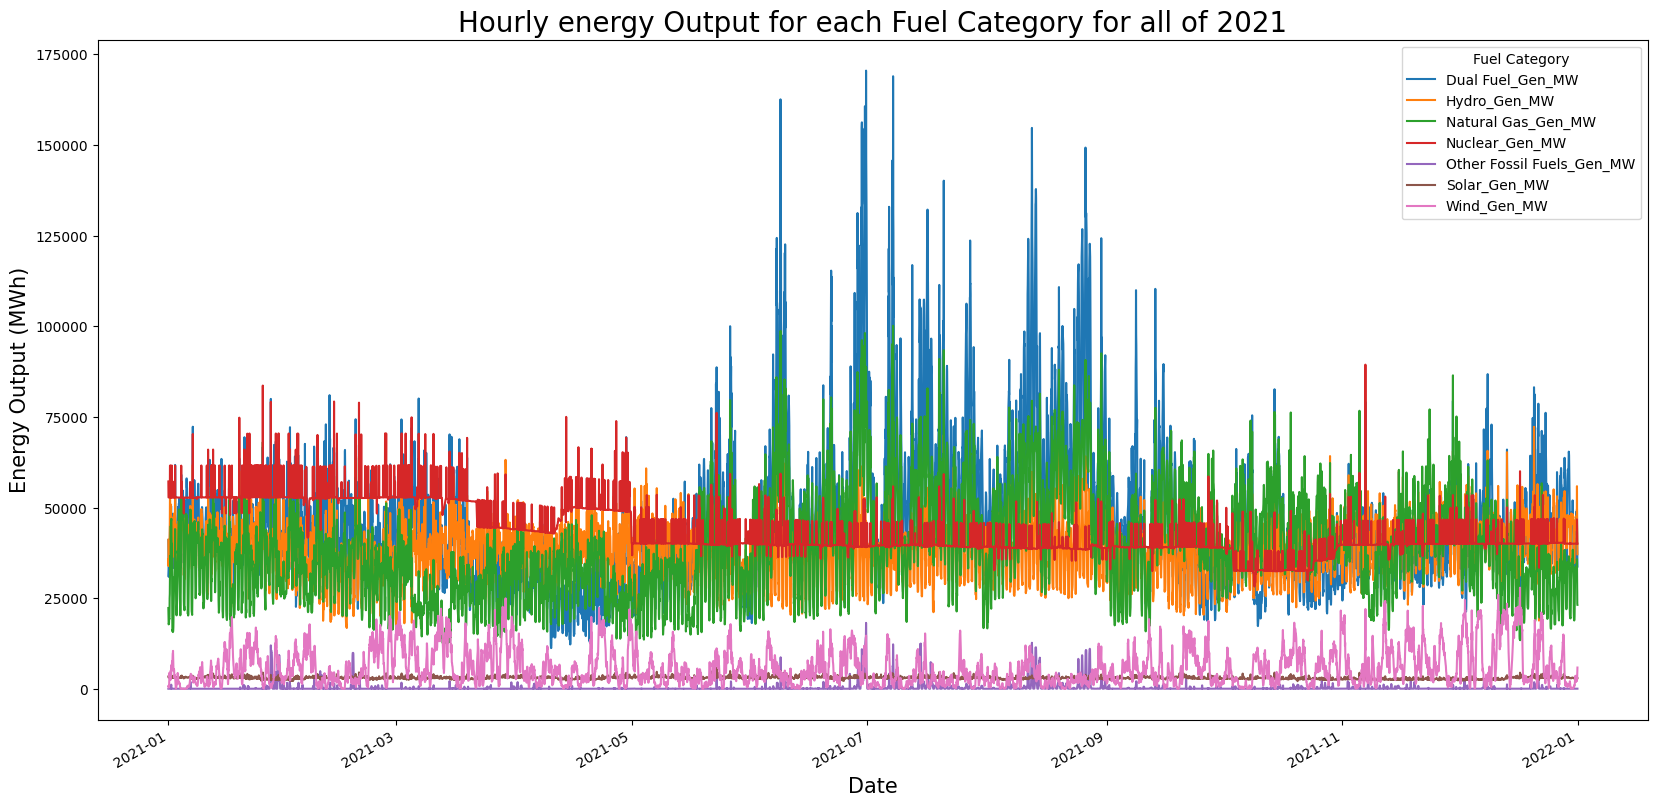

In [55]:
import matplotlib.pyplot as plt
#plot of energy output for each fuel category for all of 2021
df_new[['Dual Fuel_Gen_MW', 'Hydro_Gen_MW',
       'Natural Gas_Gen_MW', 'Nuclear_Gen_MW', 'Other Fossil Fuels_Gen_MW',
       'Solar_Gen_MW', 'Wind_Gen_MW']].plot(figsize=(20,10))
plt.title('Hourly energy Output for each Fuel Category for all of 2021', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Energy Output (MWh)', fontsize=15)


Text(0, 0.5, 'Energy Output (MWh)')

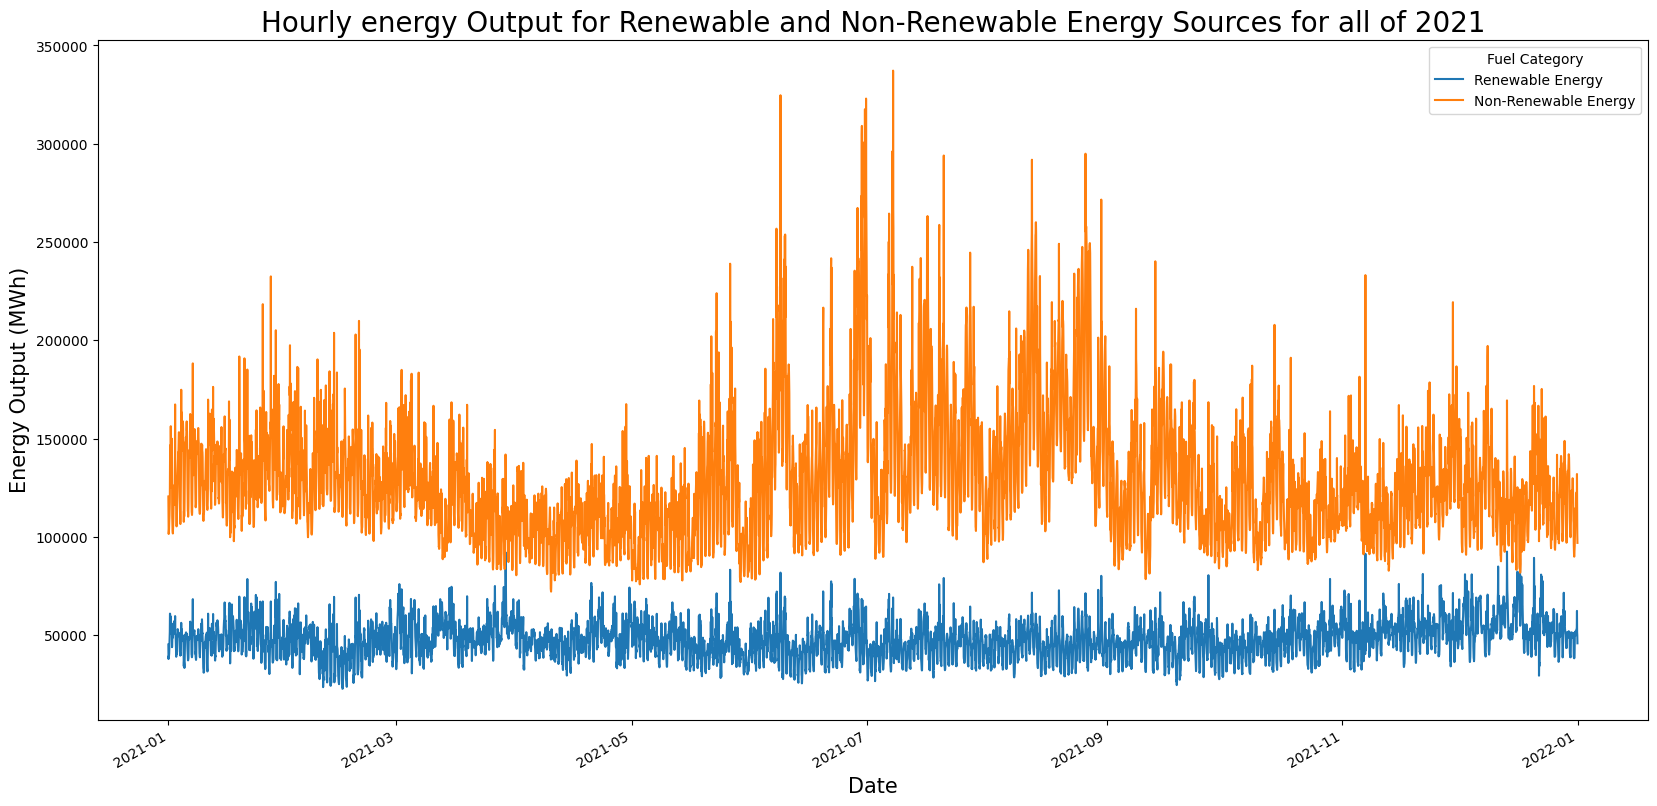

In [54]:
#aggregate data by renewable and non-renewable energy sources
df_new['Renewable Energy'] = df_new['Solar_Gen_MW'] + df_new['Wind_Gen_MW'] + df_new['Hydro_Gen_MW'] 
df_new['Non-Renewable Energy'] = df_new['Dual Fuel_Gen_MW'] + df_new['Natural Gas_Gen_MW'] + df_new['Other Fossil Fuels_Gen_MW'] + df_new['Nuclear_Gen_MW']
#plot of energy output for renewable and non-renewable energy sources for all of 2021
df_new[['Renewable Energy', 'Non-Renewable Energy']].plot(figsize=(20,10))
plt.title('Hourly energy Output for Renewable and Non-Renewable Energy Sources for all of 2021', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Energy Output (MWh)', fontsize=15)


Text(0, 0.5, 'Energy Output (MWh)')

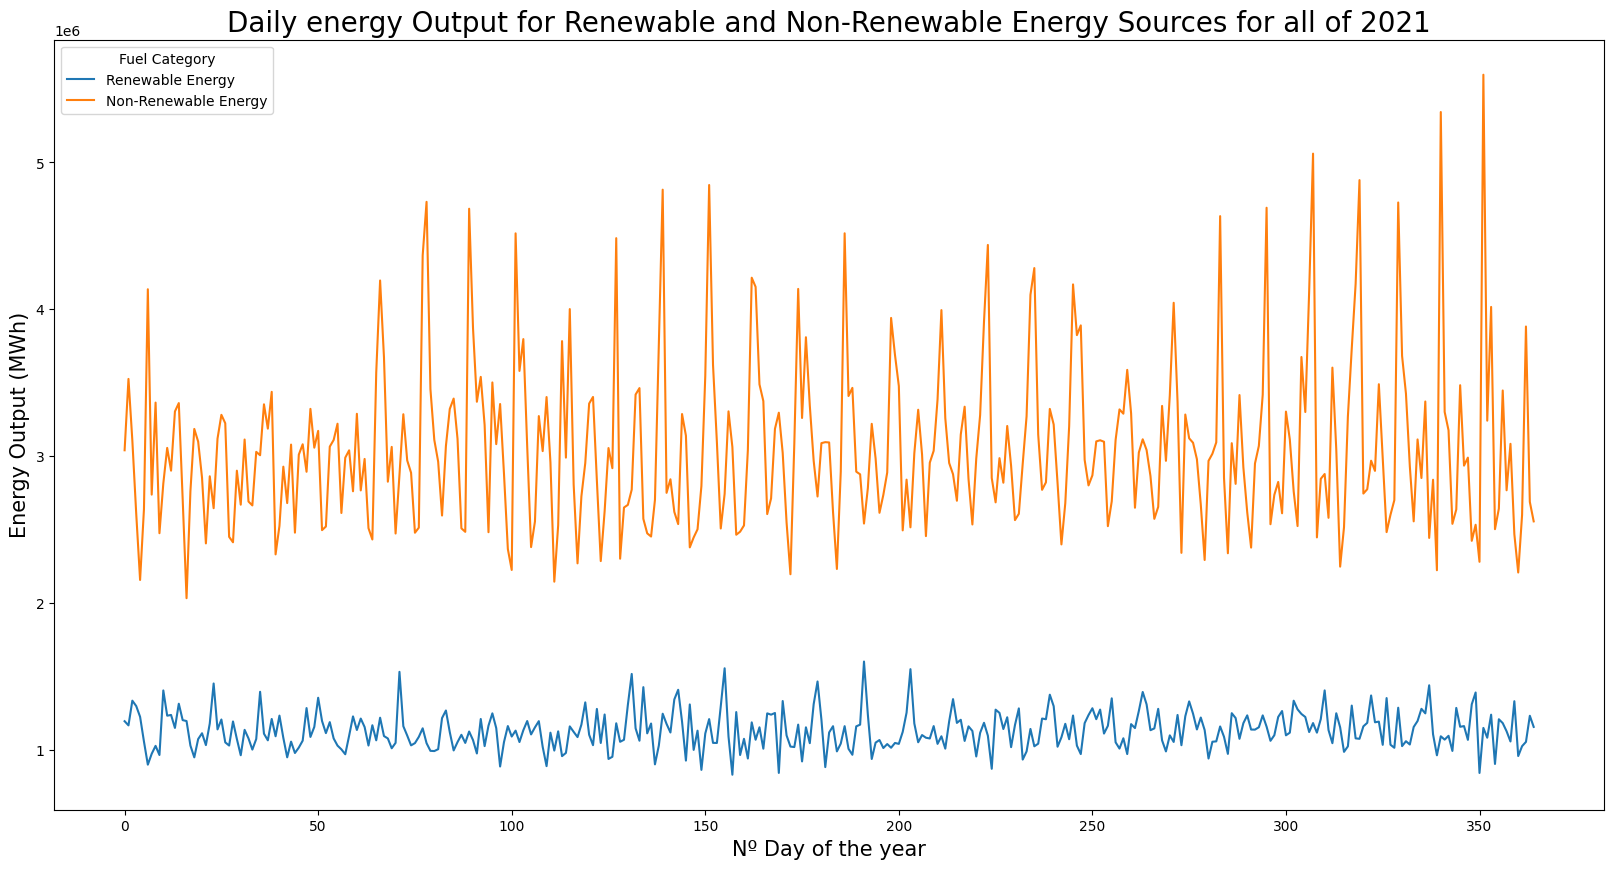

In [62]:
#aggregate by day 
df_day=df_new.groupby(['Day', 'Month', 'Year']).sum().reset_index().drop(['Hour'], axis=1)
#add datetime column
df_day['Datetime'] = pd.to_datetime(df_day[['Year', 'Month', 'Day']])
#plot of energy output for renewable and non-renewable energy sources for all of 2021
df_day[['Renewable Energy', 'Non-Renewable Energy']].plot(figsize=(20,10))
plt.title('Daily energy Output for Renewable and Non-Renewable Energy Sources for all of 2021', fontsize=20)
plt.xlabel('Nº Day of the year', fontsize=15)
plt.ylabel('Energy Output (MWh)', fontsize=15)

([<matplotlib.axis.XTick at 0x2a44ece50>,
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

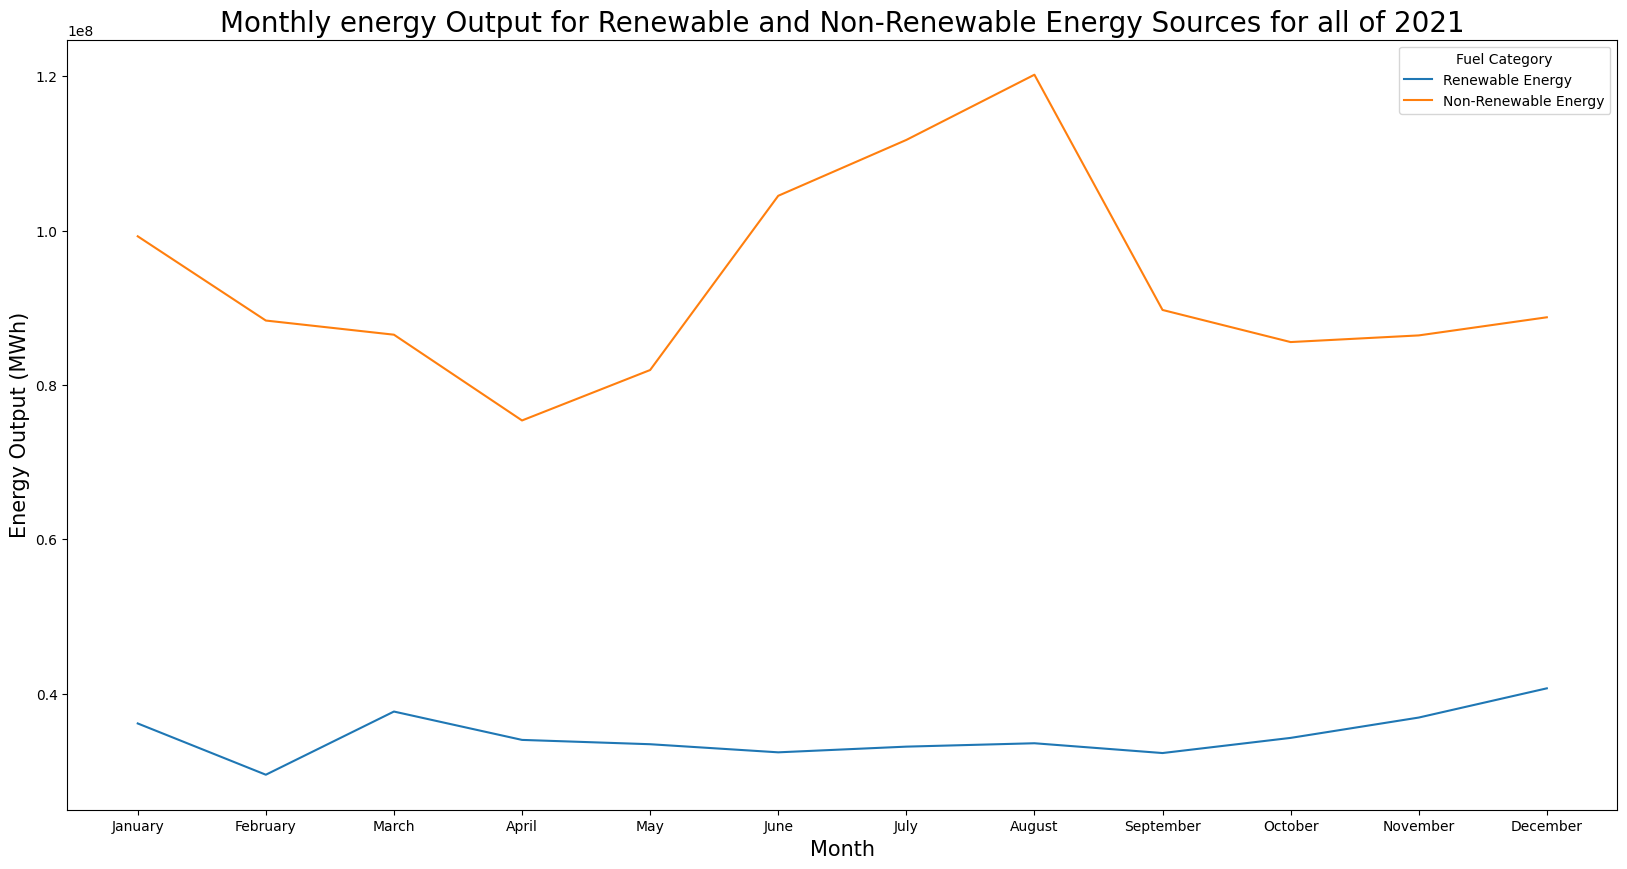

In [74]:
#aggregate by month
df_month=df_new.groupby(['Month', 'Year']).sum().reset_index().drop(['Hour', 'Day'], axis=1)
#plot of energy output for renewable and non-renewable energy sources for all of 2021
df_month[['Renewable Energy', 'Non-Renewable Energy']].plot(figsize=(20,10))
plt.title('Monthly energy Output for Renewable and Non-Renewable Energy Sources for all of 2021', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Energy Output (MWh)', fontsize=15)
#change xticks to month names
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

([<matplotlib.axis.XTick at 0x2a4562fb0>,
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

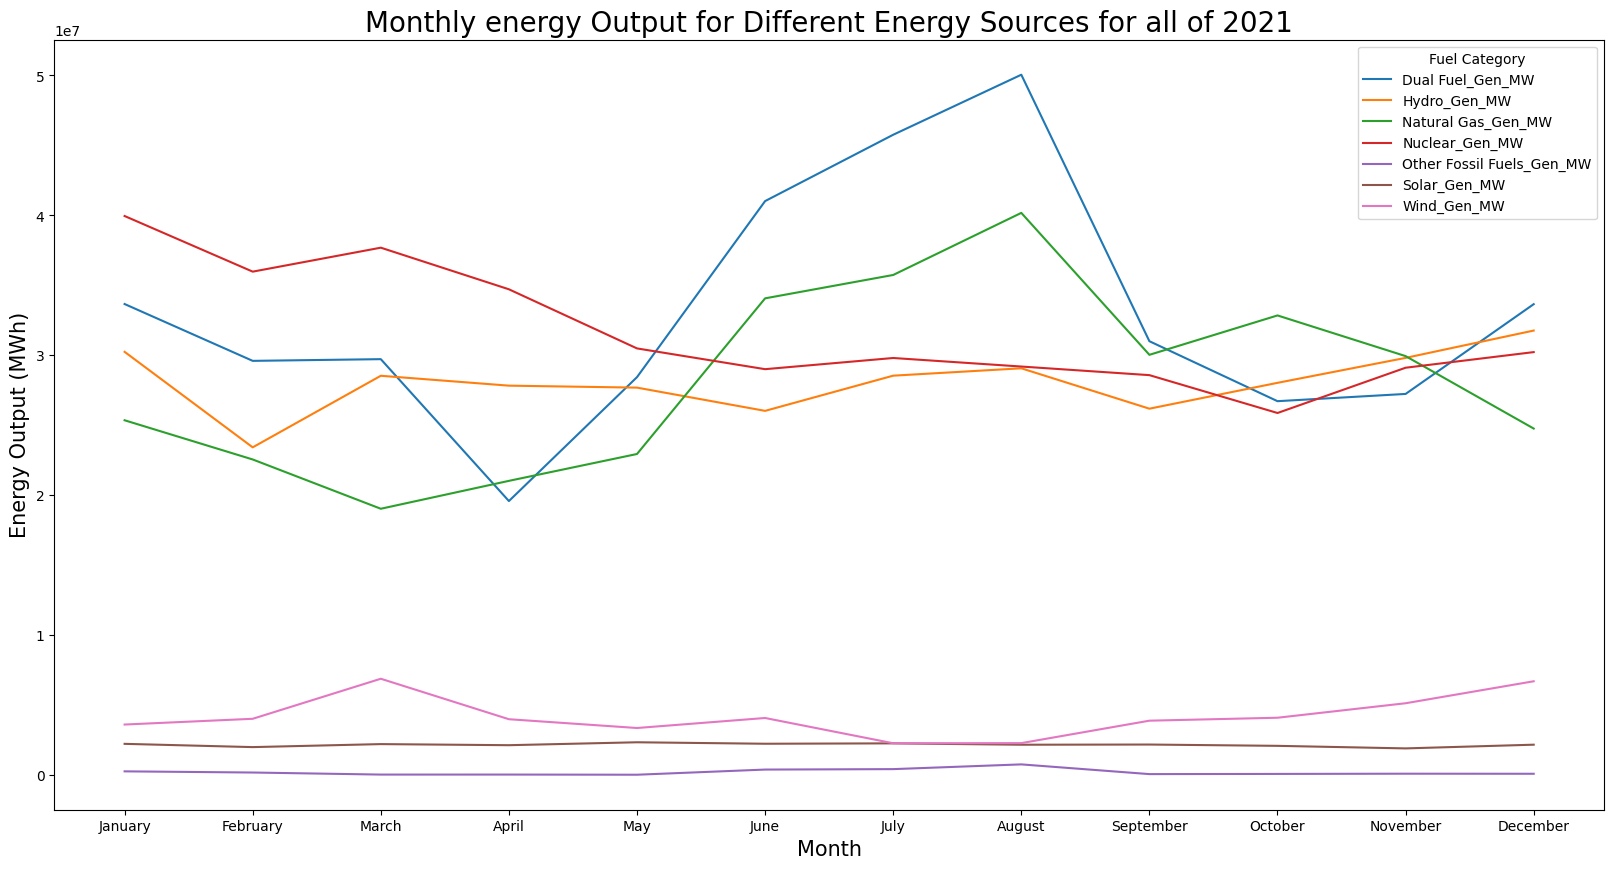

In [75]:
#plot of energy output for all fuel categories for all of 2021
df_month[['Dual Fuel_Gen_MW', 'Hydro_Gen_MW',
       'Natural Gas_Gen_MW', 'Nuclear_Gen_MW', 'Other Fossil Fuels_Gen_MW',
       'Solar_Gen_MW', 'Wind_Gen_MW']].plot(figsize=(20,10))
plt.title('Monthly energy Output for Different Energy Sources for all of 2021', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Energy Output (MWh)', fontsize=15)
#change xticks to month names
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

Text(0.5, 1.0, 'Correlation of Energy Output for each Fuel Category')

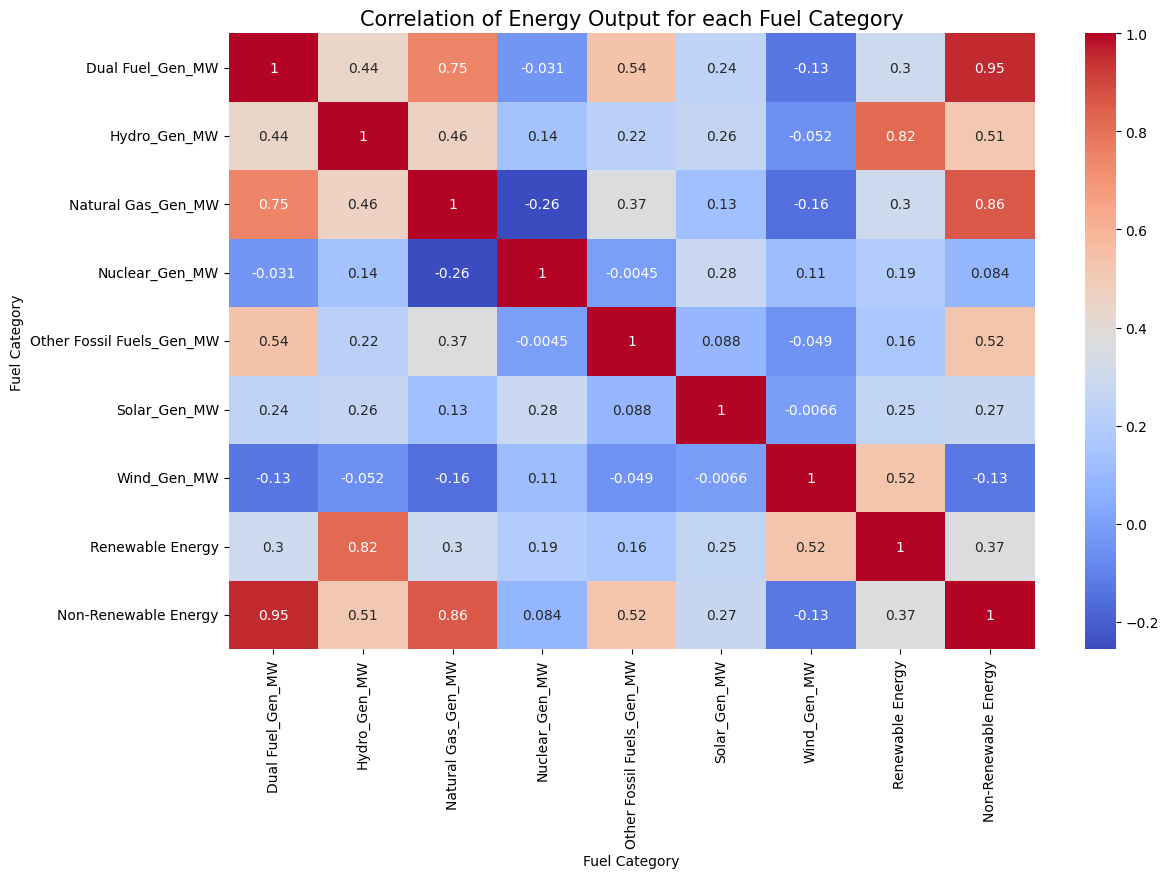

In [69]:
#plot heatmap of correlation of energy output for each fuel category
import seaborn as sns
plt.figure(figsize=(13,8))
sns.heatmap(df_new.iloc[:,4:].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Energy Output for each Fuel Category', fontsize=15)

### MERGE DATA FOR TEST

In [1]:
# Import necessary packages
import pandas as pd
import os

# Navigate to the folder where your CSV files are 
os.chdir('/Users/claudiaarresemata/Desktop/MIT courses/FALL/ML/PROJECT/test_2022')

# Create an empty dataframe
df = pd.DataFrame([])

# Read all CSV files and append them to df
for root, dirs, files in os.walk("."):
   for name in files:
       df_temp = pd.read_csv(name, encoding= 'unicode_escape')
       df = pd.concat([df,df_temp])

# Save df to a CSV file

In [2]:
df

,Time Stamp,Time Zone,Fuel Category,Gen MW
0,07/25/2022 00:05:00,EDT,Dual Fuel,6522.0
1,07/25/2022 00:05:00,EDT,Natural Gas,4952.0
2,07/25/2022 00:05:00,EDT,Nuclear,3158.0
3,07/25/2022 00:05:00,EDT,Other Fossil Fuels,16.0
4,07/25/2022 00:05:00,EDT,Other Renewables,239.0
...,...,...,...,...
2088,07/17/2022 00:00:00,EDT,Nuclear,3217.0
2089,07/17/2022 00:00:00,EDT,Other Fossil Fuels,0.0
2090,07/17/2022 00:00:00,EDT,Other Renewables,268.0
2091,07/17/2022 00:00:00,EDT,Wind,83.0
